# Process Renovar O3 Data according to reference station

## Constants and imports

In [66]:
input_data_directory = 'data/output/'
SENSOR_1_NAME = 'alpha_o3_1_conc'
SENSOR_2_NAME = 'alpha_o3_2_conc'
sensor_1_data_path = input_data_directory + SENSOR_1_NAME + '_dataframe.csv'
sensor_2_data_path = input_data_directory + SENSOR_2_NAME + '_dataframe.csv'
temperature_data_path = input_data_directory + 'chamber_tempdataframe.csv'
temperature_data_path_1HR = input_data_directory + 'chamber_tempdataframe_1hr.csv'

## Load Alphasense O3 (1) sensor data

In [67]:
import pandas as pd

sensor_1_data = pd.read_csv(sensor_1_data_path)
sensor_1_data['DateTime'] = pd.to_datetime(sensor_1_data['DateTime'], infer_datetime_format=True)
sensor_1_data = sensor_1_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_1_data.index = sensor_1_data['DateTime']
sensor_1_data = sensor_1_data.drop(columns='DateTime')
sensor_1_data = sensor_1_data[['value', 'Tag']].rename(columns={'value': 'measuring 1', 'Tag': 'Tag 1'})
sensor_1_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_2970/3762244334.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_1_data['DateTime'] = pd.to_datetime(sensor_1_data['DateTime'], infer_datetime_format=True)


,measuring 1,Tag 1
DateTime,,
2022-11-20 13:45:00,NaN,STABILIZING
2022-11-20 14:00:00,NaN,STABILIZING
2022-11-20 14:15:00,NaN,STABILIZING
2022-11-20 14:30:00,NaN,STABILIZING
2022-11-20 14:45:00,NaN,STABILIZING


## Load Alphasense O3 (2) sensor data

In [68]:
import pandas as pd

sensor_2_data = pd.read_csv(sensor_2_data_path)
sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)
sensor_2_data = sensor_2_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_2_data.index = sensor_2_data['DateTime']
sensor_2_data = sensor_2_data.drop(columns='DateTime')
sensor_2_data = sensor_2_data[['value', 'Tag']].rename(columns={'value': 'measuring 2', 'Tag': 'Tag 2'})
sensor_2_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_2970/2079243632.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)


,measuring 2,Tag 2
DateTime,,
2022-11-21 10:30:00,NaN,STABILIZING
2022-11-21 10:45:00,NaN,STABILIZING
2022-11-21 11:00:00,NaN,STABILIZING
2022-11-21 11:15:00,54.508248,STABILIZING
2022-11-21 11:30:00,NaN,STABILIZING


## Load sensor chamber temperature data

In [69]:
import pandas as pd

temperature_data = pd.read_csv(temperature_data_path)
temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)
temperature_data = temperature_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
temperature_data.index = temperature_data['DateTime']
temperature_data = temperature_data.drop(columns='DateTime')
temperature_data = temperature_data[['measuring', 'Tag']]
temperature_data = temperature_data.rename(columns={'measuring': 'temperature', 'Tag': 'Temperature Tag'})
temperature_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_2970/2292504063.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)


,temperature,Temperature Tag
DateTime,,
2022-11-21 10:45:00,NaN,MISSING
2022-11-21 11:00:00,NaN,MISSING
2022-11-21 11:15:00,NaN,MISSING
2022-11-21 11:30:00,30.375,VALID
2022-11-21 11:45:00,30.715,VALID


## Merge sensor and temperature data

In [70]:
sensor_data = pd.concat([sensor_1_data, sensor_2_data, temperature_data], axis=1, join='outer')
sensor_1_data = pd.concat([sensor_1_data, temperature_data], axis=1, join='outer')
sensor_2_data = pd.concat([sensor_2_data, temperature_data], axis=1, join='outer')

In [71]:
sensor_1_data['Temperature Tag'] = sensor_1_data['Temperature Tag'].fillna(value='VALID')
sensor_1_data['Tag 1'] = sensor_1_data['Tag 1'].fillna(value='VALID')
sensor_1_data['Hour'] = sensor_1_data.index.hour
sensor_1_data.head()

,measuring 1,Tag 1,temperature,Temperature Tag,Hour
DateTime,,,,,
2022-11-20 13:45:00,NaN,STABILIZING,NaN,VALID,13
2022-11-20 14:00:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:15:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:30:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:45:00,NaN,STABILIZING,NaN,VALID,14


In [72]:
sensor_2_data['Temperature Tag'] = sensor_2_data['Temperature Tag'].fillna(value='VALID')
sensor_2_data['Tag 2'] = sensor_2_data['Tag 2'].fillna(value='VALID')
sensor_2_data['Hour'] = sensor_2_data.index.hour
sensor_2_data.head()

,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,
2022-11-21 10:30:00,NaN,STABILIZING,NaN,VALID,10
2022-11-21 10:45:00,NaN,STABILIZING,NaN,MISSING,10
2022-11-21 11:00:00,NaN,STABILIZING,NaN,MISSING,11
2022-11-21 11:15:00,54.508248,STABILIZING,NaN,MISSING,11
2022-11-21 11:30:00,NaN,STABILIZING,30.375,VALID,11


In [73]:
sensor_data['Temperature Tag'] = sensor_data['Temperature Tag'].fillna(value='VALID')
sensor_data['Tag 1'] = sensor_data['Tag 1'].fillna(value='VALID')
sensor_data['Tag 2'] = sensor_data['Tag 2'].fillna(value='VALID')
sensor_data['Hour'] = sensor_data.index.hour
sensor_data.head()

,measuring 1,Tag 1,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,,,
2022-11-20 13:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,13
2022-11-20 14:00:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:15:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:30:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14


## Plot concentration and temperature

<Axes: xlabel='DateTime'>

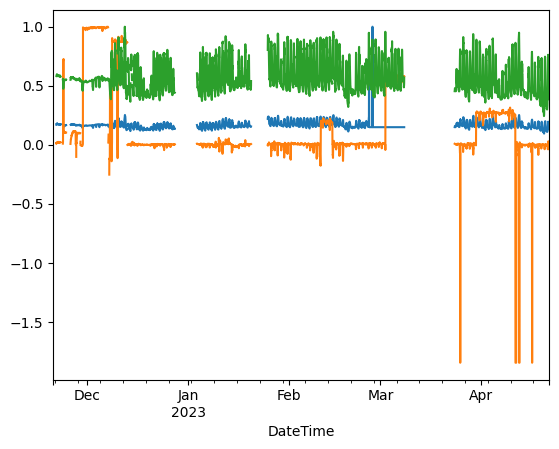

In [74]:
import numpy as np

max_temp_value = sensor_data['temperature'].max()
max_conc_value_1 = sensor_data['measuring 1'].max()
max_conc_value_2 = sensor_data['measuring 2'].max()
sensor_data['temperature'].apply(lambda v: v/max_temp_value if not np.isnan(v) else v).plot()
sensor_data['measuring 1'].apply(lambda v: v/max_conc_value_1 if not np.isnan(v) else v).plot()
sensor_data['measuring 2'].apply(lambda v: v/max_conc_value_2 if not np.isnan(v) else v).plot()

## Tag concentration data according to environmental tag

In [75]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

def tag_by_env_tag(sensor_1_tag, sensor_2_tag, env_tag):
    if sensor_1_tag != 'VALID': return sensor_1_tag
    if sensor_2_tag != 'VALID': return sensor_2_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_data[['Tag 1', 'Tag 2', 'Temperature Tag']]
sensor_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1], df[2]), axis=1)
sensor_data = sensor_data.drop(columns=['Tag 1', 'Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_data)
data_contabilization

,#,%
MISSING,2763,18.892308
LTLL,3134,21.42906
GTUL,0,0.0
BADSPIKE,56,0.382906
VALID,4228,28.909402
LTQTLE01,143,0.977778
GTQTLE99,84,0.574359
INVALID_ENV,111,0.758974
TOTAL,14625,100.0


### Sensor 1

In [76]:
def tag_by_env_tag(sensor_tag, env_tag):
    if sensor_tag != 'VALID': return sensor_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_1_data[['Tag 1', 'Temperature Tag']]
sensor_1_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1]), axis=1)
sensor_1_data = sensor_1_data.drop(columns=['Tag 1', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_1_data)
data_contabilization

,#,%
MISSING,2750,18.803419
LTLL,3134,21.42906
GTUL,0,0.0
BADSPIKE,56,0.382906
VALID,4277,29.244444
LTQTLE01,102,0.697436
GTQTLE99,64,0.437607
INVALID_ENV,136,0.929915
TOTAL,14625,100.0


### Sensor 2

In [77]:
tags_dataframe = sensor_2_data[['Tag 2', 'Temperature Tag']]
sensor_2_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1]), axis=1)
sensor_2_data = sensor_2_data.drop(columns=['Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_2_data)
data_contabilization

,#,%
MISSING,2734,18.800715
LTLL,49,0.336955
GTUL,0,0.0
BADSPIKE,0,0.0
VALID,10507,72.252785
LTQTLE01,125,0.859579
GTQTLE99,147,1.010865
INVALID_ENV,307,2.111126
TOTAL,14542,100.0


<Axes: xlabel='DateTime'>

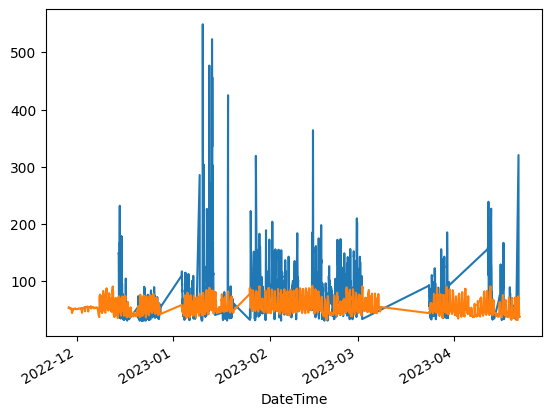

In [78]:
sensor_1_data[sensor_1_data['Tag'] == 'VALID']['measuring 1'].plot()
sensor_2_data[sensor_2_data['Tag'] == 'VALID']['measuring 2'].plot()

## Analyse data

In [79]:
valid_dataframe = sensor_data[sensor_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_1 = sensor_1_data[sensor_1_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_2 = sensor_2_data[sensor_2_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_1.head()

,measuring 1,temperature,Hour
DateTime,,,
2022-12-14 11:30:00,148.977432,31.755,11
2022-12-14 11:45:00,148.977432,31.815,11
2022-12-14 14:15:00,38.164608,31.720,14
2022-12-14 14:30:00,41.119224,31.545,14
2022-12-14 14:45:00,47.519256,31.295,14


### Sensor 1

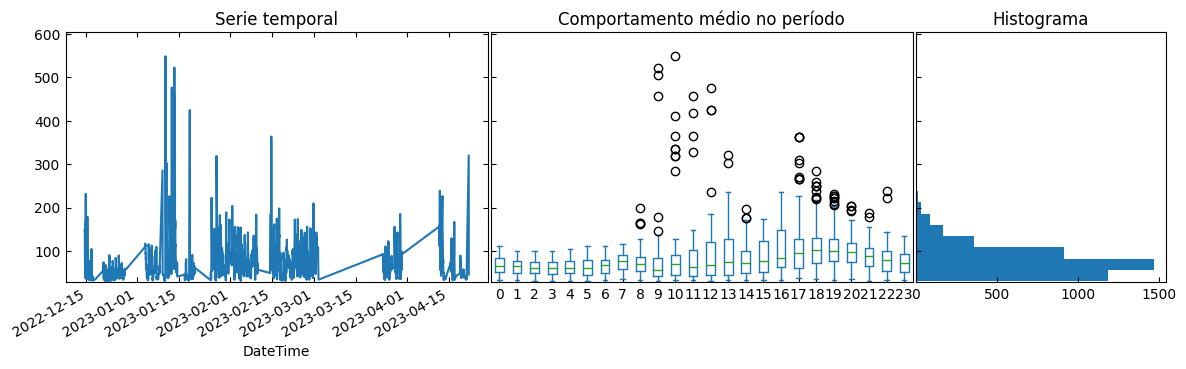

In [80]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

dataframe = valid_dataframe_1.rename(columns={'measuring 1': 'measuring'})
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

### Sensor 2

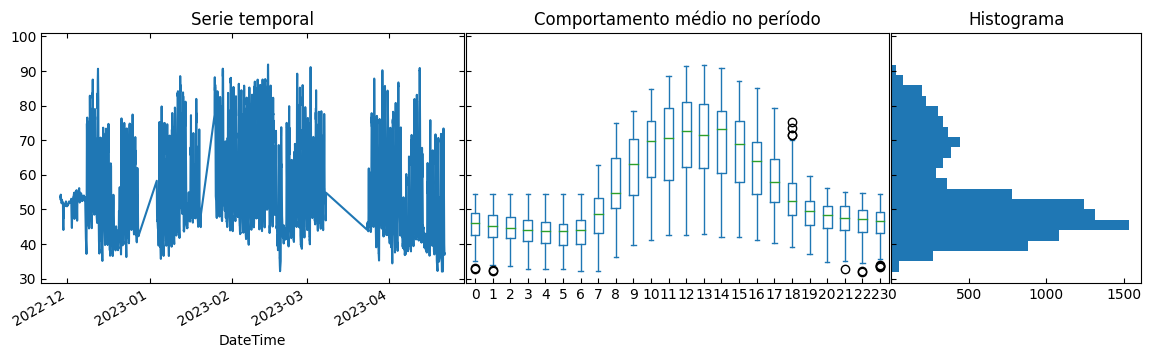

In [81]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

dataframe = valid_dataframe_2.rename(columns={'measuring 2': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. temperature

Spearmans correlation coefficient: 0.37
Samples are correlated (reject H0) p=0.00
Kendall correlation coefficient: 0.37
Samples are correlated (reject H0) p=0.00


Text(0.01, 0.9, 'Coef. de Kendall=0.27, p<0.05')

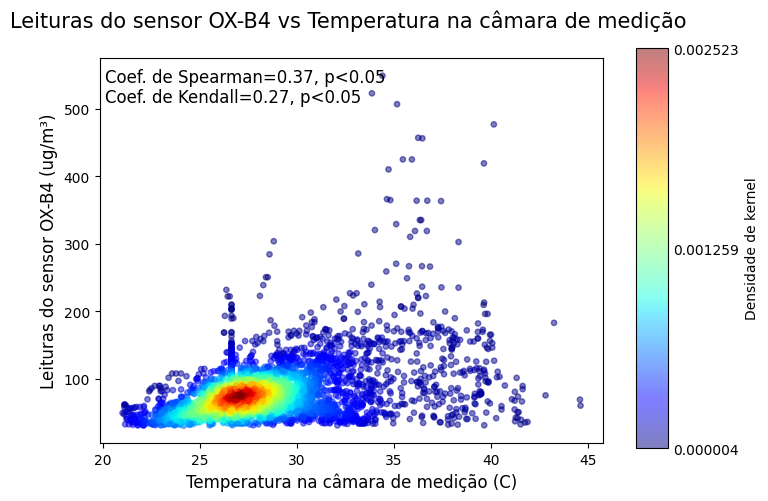

In [82]:
from scipy.stats import kendalltau, spearmanr, gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*5,5))
xy = np.vstack([valid_dataframe['temperature'],valid_dataframe['measuring 1']])
z = gaussian_kde(xy)(xy)

plt.scatter(valid_dataframe['temperature'], valid_dataframe['measuring 1'], c=z, cmap='jet', s=15, alpha=.5)

plt.title('Leituras do sensor OX-B4 vs Temperatura na câmara de medição \n', 
          fontdict={'fontsize':15})
plt.xlabel('Temperatura na câmara de medição (C)', 
           fontsize=12)
plt.ylabel('Leituras do sensor OX-B4 (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                    nan_policy='omit')

print('Spearmans correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

kendall, pken = kendalltau( valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

cax = plt.axes([0.95, 0.1, 0.05, 0.8])
cbar = plt.colorbar(orientation='vertical', cax=cax, label="Densidade de kernel")
ticks = [z.min(), (z.max() - z.min()) / 2, z.max()]
cbar.set_ticks(np.array(ticks))
cbar.ax.tick_params(labelsize=10, length=0)

string = 'Coef. de Spearman=%.2f, p<0.05' % coef
plt.text(0.01, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Coef. de Kendall=%.2f, p<0.05' % kendall
plt.text(0.01, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Plot sensor 2 vs. Temperature

Spearmans correlation coefficient: 0.85
Samples are correlated (reject H0) p=0.00
Kendall correlation coefficient: 0.85
Samples are correlated (reject H0) p=0.00


Text(0.05, 0.9, 'Coef. de Kendall=0.70, p<0.05')

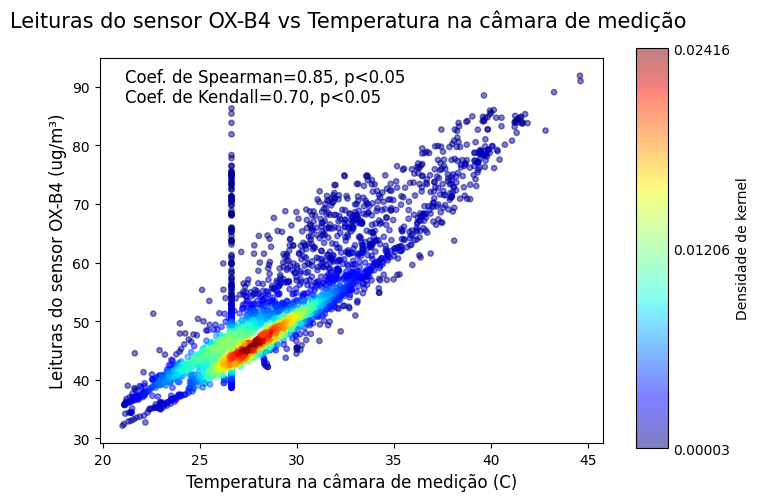

In [83]:
from scipy.stats import kendalltau, spearmanr, gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*5,5))
valid_measuring_2_df = valid_dataframe[valid_dataframe['measuring 2'].isna() == False]
xy = np.vstack([valid_measuring_2_df['temperature'],valid_measuring_2_df['measuring 2']])
z = gaussian_kde(xy)(xy)

plt.scatter(valid_measuring_2_df['temperature'], valid_measuring_2_df['measuring 2'], c=z, cmap='jet', s=15, alpha=.5)

plt.title('Leituras do sensor OX-B4 vs Temperatura na câmara de medição \n', 
          fontdict={'fontsize':15})
plt.xlabel('Temperatura na câmara de medição (C)', 
           fontsize=12)
plt.ylabel('Leituras do sensor OX-B4 (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_measuring_2_df['temperature'], valid_measuring_2_df['measuring 2'], 
                    nan_policy='omit')

print('Spearmans correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

kendall, pken = kendalltau( valid_measuring_2_df['temperature'], valid_measuring_2_df['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

cax = plt.axes([0.95, 0.1, 0.05, 0.8])
cbar = plt.colorbar(orientation='vertical', cax=cax, label="Densidade de kernel")
ticks = [z.min(), (z.max() - z.min()) / 2, z.max()]
cbar.set_ticks(np.array(ticks))
cbar.ax.tick_params(labelsize=10, length=0)

string = 'Coef. de Spearman=%.2f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Coef. de Kendall=%.2f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Remove temperature dependance

### Sensor 1

In [84]:
from sklearn.linear_model import LinearRegression

sample_dataframe = valid_dataframe_1[['temperature', 'measuring 1']].dropna()
temperature = sample_dataframe['temperature']
concentration = sample_dataframe['measuring 1']

# Reshape the data to have a 2D array for sklearn
X = temperature.values.reshape(-1, 1)
y = concentration.values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict concentration based on the temperature
concentration_predicted = model.predict(X)

# Remove the temperature component from the concentration
concentration_without_temperature = y - concentration_predicted

# Create a new pandas Series with the result
result_series = pd.Series(concentration_without_temperature - np.min(concentration_without_temperature), 
                            index=sample_dataframe.index, name = 'measuring 1 no Temp')

# Print the result
print(result_series)

DateTime
2022-12-14 11:30:00    161.992835
2022-12-14 11:45:00    161.715384
2022-12-14 14:15:00     51.341858
2022-12-14 14:30:00     55.105706
2022-12-14 14:45:00     62.661785
                          ...    
2023-04-20 20:15:00     91.658793
2023-04-20 20:30:00     90.062039
2023-04-20 21:00:00    108.664787
2023-04-21 13:45:00    322.758524
2023-04-21 14:30:00     52.805418
Name: measuring 1 no Temp, Length: 4277, dtype: float64


#### Plot the results

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_2970/2764325294.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 1.0, 'Alphasense SO2 sensor 1 concentration without temperature component vs Sensor chamber temperature \n')

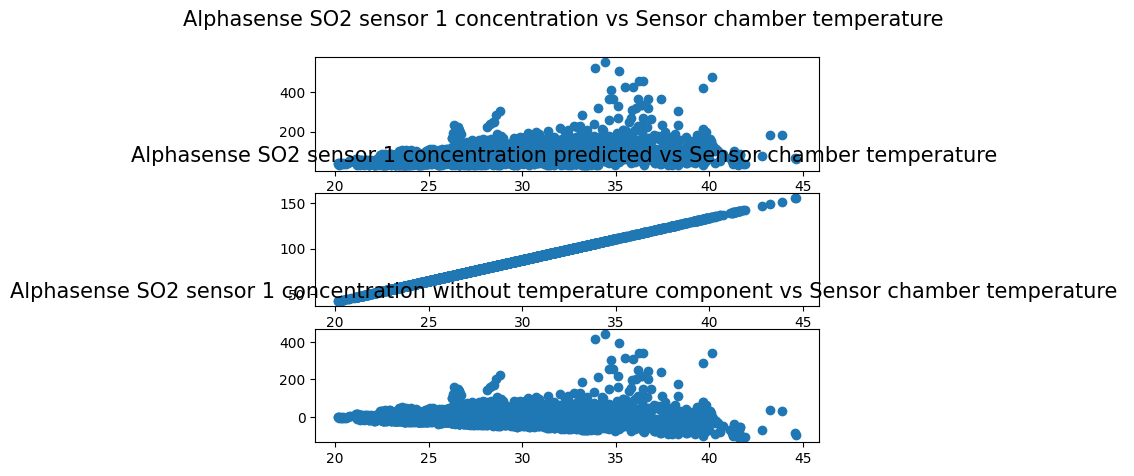

In [85]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*5,5))
plt.subplot(3,1,1)
plt.scatter(temperature, concentration)
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,2)
plt.scatter(temperature, concentration_predicted)
plt.title('Alphasense SO2 sensor 1 concentration predicted vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,3)
plt.scatter(temperature, concentration_without_temperature)
plt.title('Alphasense SO2 sensor 1 concentration without temperature component vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})

#### Store concentration without temperature in dataframe

In [86]:
valid_dataframe_1 = pd.concat([valid_dataframe_1,result_series], axis=1)
valid_dataframe_1.head()

,measuring 1,temperature,Hour,measuring 1 no Temp
DateTime,,,,
2022-12-14 11:30:00,148.977432,31.755,11,161.992835
2022-12-14 11:45:00,148.977432,31.815,11,161.715384
2022-12-14 14:15:00,38.164608,31.720,14,51.341858
2022-12-14 14:30:00,41.119224,31.545,14,55.105706
2022-12-14 14:45:00,47.519256,31.295,14,62.661785


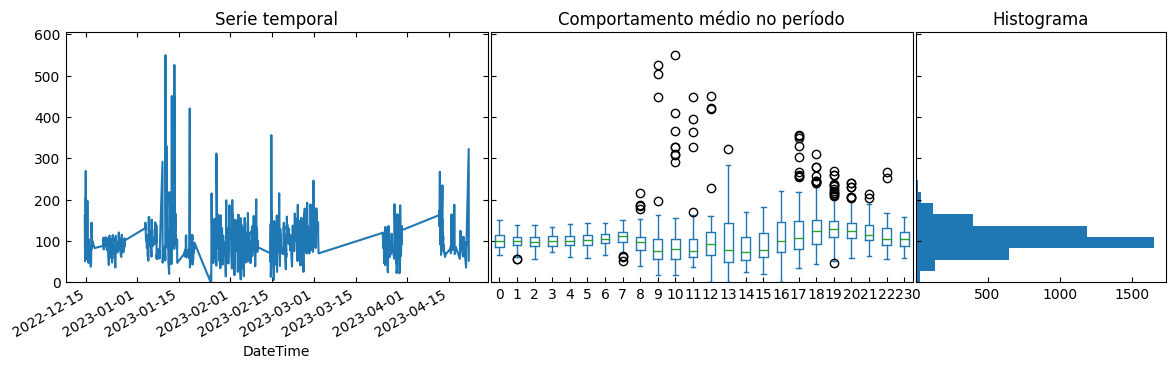

In [87]:
dataframe = valid_dataframe_1.rename(columns={'measuring 1 no Temp': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

### Sensor 2

In [88]:
from sklearn.linear_model import LinearRegression

sample_dataframe = valid_dataframe_2[['temperature', 'measuring 2']].dropna()
temperature = sample_dataframe['temperature']
concentration = sample_dataframe['measuring 2']

# Reshape the data to have a 2D array for sklearn
X = temperature.values.reshape(-1, 1)
y = concentration.values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict concentration based on the temperature
concentration_predicted = model.predict(X)

# Remove the temperature component from the concentration
concentration_without_temperature = y - concentration_predicted

# Create a new pandas Series with the result
result_series = pd.Series(concentration_without_temperature - np.min(concentration_without_temperature), 
                            index=sample_dataframe.index, name = 'measuring 2 no Temp')

# Print the result
print(result_series)

DateTime
2022-11-28 10:45:00    11.280922
2022-11-28 11:00:00    11.103473
2022-11-28 11:15:00    11.221859
2022-11-28 11:30:00    11.221859
2022-11-28 11:45:00    11.412618
                         ...    
2023-04-21 20:45:00     9.294149
2023-04-21 21:00:00     9.445524
2023-04-21 21:15:00     9.511218
2023-04-21 21:30:00     9.719303
2023-04-21 21:45:00    10.160904
Name: measuring 2 no Temp, Length: 10507, dtype: float64


#### Plot the results

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_2970/3588942709.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 1.0, 'Alphasense SO2 sensor 2 concentration without temperature component vs Sensor chamber temperature \n')

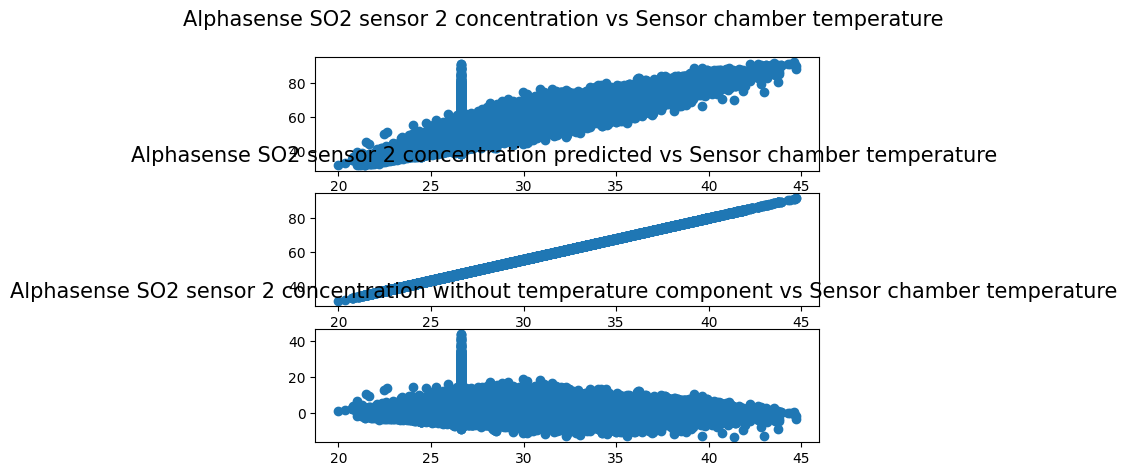

In [89]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*5,5))
plt.subplot(3,1,1)
plt.scatter(temperature, concentration)
plt.title('Alphasense SO2 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,2)
plt.scatter(temperature, concentration_predicted)
plt.title('Alphasense SO2 sensor 2 concentration predicted vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,3)
plt.scatter(temperature, concentration_without_temperature)
plt.title('Alphasense SO2 sensor 2 concentration without temperature component vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})

#### Store concentration without temperature in dataframe

In [90]:
valid_dataframe_2 = pd.concat([valid_dataframe_2,result_series], axis=1)
valid_dataframe_2.head()

,measuring 2,temperature,Hour,measuring 2 no Temp
DateTime,,,,
2022-11-28 10:45:00,52.986768,29.775,10,11.280922
2022-11-28 11:00:00,53.507016,30.060,11,11.103473
2022-11-28 11:15:00,53.870208,30.160,11,11.221859
2022-11-28 11:30:00,53.870208,30.160,11,11.221859
2022-11-28 11:45:00,53.791680,30.050,11,11.412618


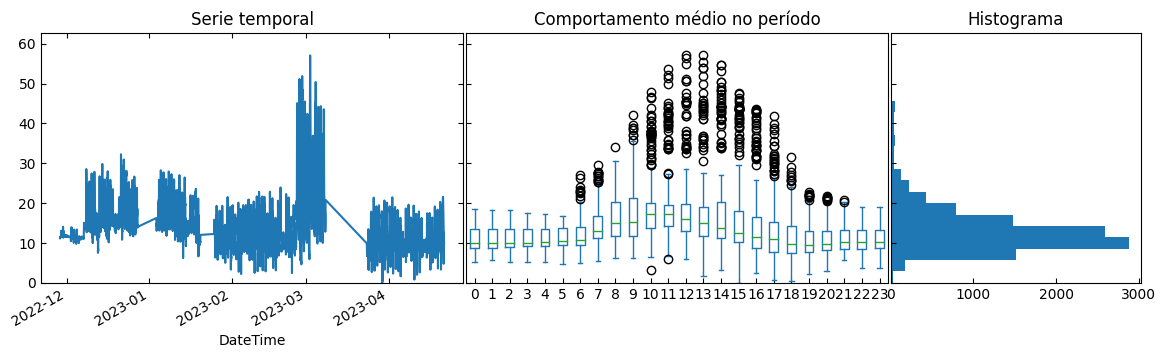

In [91]:
dataframe = valid_dataframe_2.rename(columns={'measuring 2 no Temp': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. sensor 2

Spearmans correlation coefficient: 0.324
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.324
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.233, p<0.05")

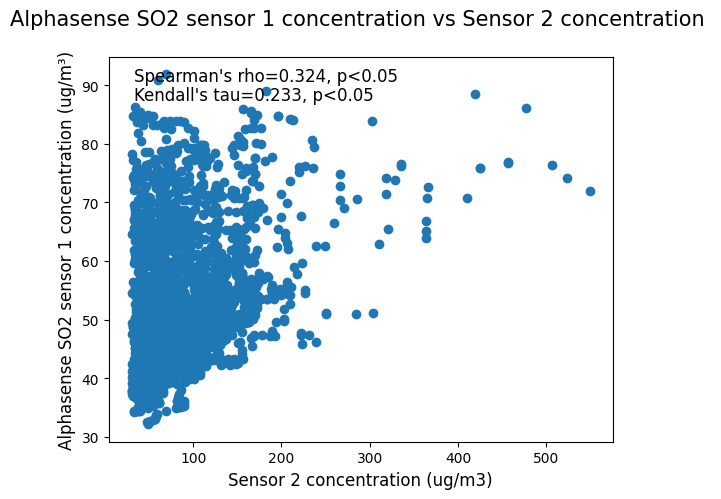

In [92]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*5,5))
plt.scatter(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'])
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor 2 concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor 2 concentration (ug/m3)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

# Resample Data

### Sensor 1

,measuring 1,temperature,Hour,measuring 1 no Temp,Count 1
DateTime,,,,,
2022-12-14 11:30:00,148.977432,31.7850,11,161.854110,2
2022-12-14 12:30:00,NaN,NaN,12,NaN,0
2022-12-14 13:30:00,NaN,NaN,13,NaN,0
2022-12-14 14:30:00,42.267696,31.5200,14,56.369783,3
2022-12-14 15:30:00,50.822340,30.5675,15,69.328964,4


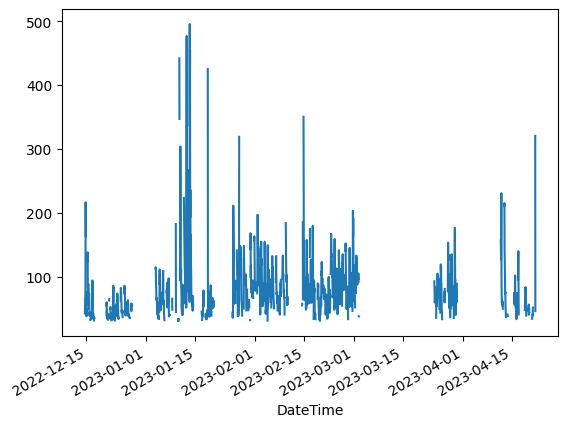

In [93]:
data_1_1HR = valid_dataframe_1.resample('H').mean()
data_1_1HR['Hour'] = data_1_1HR.index.hour
data_1_1HR['Count 1'] = (valid_dataframe_1['measuring 1'].resample('H').count())
data_1_1HR.index = data_1_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_1_1HR['measuring 1'].plot()
data_1_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

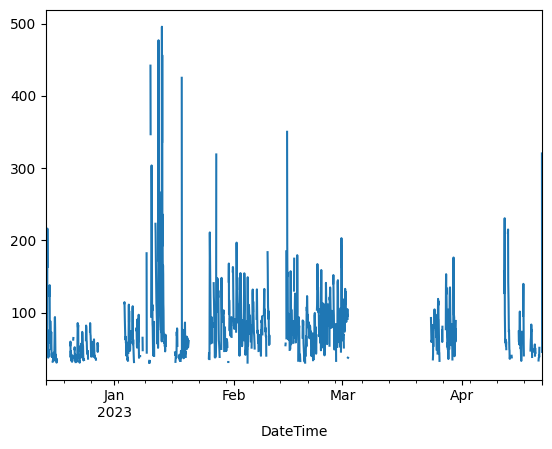

In [94]:
data_1_1HR['Tag'] = (data_1_1HR[['Count 1']].apply(lambda df: 'VALID' if df[0] >= 3 else 'LOWSAMPLES', 
                                                            axis=1))
data_1_1HR['measuring 1'].resample('H').mean().plot()

#### Valid data contabilization

In [95]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_1_1HR)
data_contabilization

,#,%
LOWSAMPLES,2055,66.807542
VALID,1021,33.192458
TOTAL,3076,100.0


In [96]:
valid_data_1_1HR = data_1_1HR[data_1_1HR['Tag'] == 'VALID']

### Sensor 2

,measuring 2,temperature,Hour,measuring 2 no Temp,Count 2
DateTime,,,,,
2022-11-28 10:30:00,52.986768,29.77500,10,11.280922,1
2022-11-28 11:30:00,53.759778,30.10750,11,11.239952,4
2022-11-28 12:30:00,53.445666,29.88250,12,11.476654,4
2022-11-28 13:30:00,54.100884,30.24125,13,11.253630,4
2022-11-28 14:30:00,53.921742,30.13250,14,11.340715,4


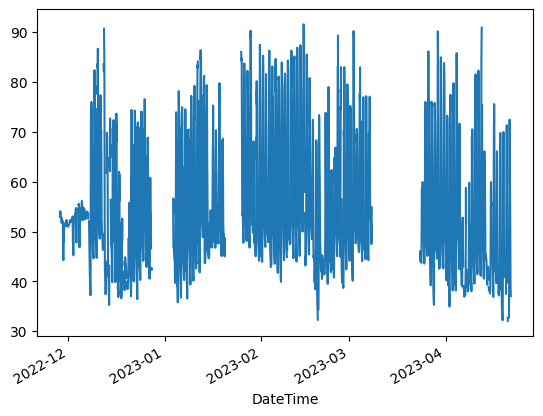

In [97]:
data_2_1HR = valid_dataframe_2.resample('H').mean()
data_2_1HR['Hour'] = data_2_1HR.index.hour
data_2_1HR['Count 2'] = (valid_dataframe_2['measuring 2'].resample('H').count())
data_2_1HR.index = data_2_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_2_1HR['measuring 2'].plot()
data_2_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

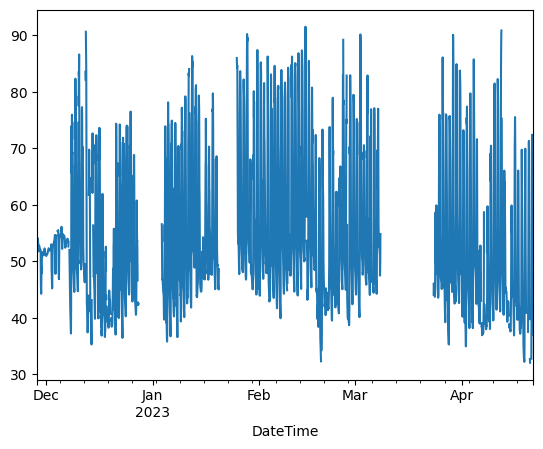

In [98]:
data_2_1HR['Tag'] = (data_2_1HR[['Count 2']].apply(lambda df: 'VALID' if df[0] >= 3 else 'LOWSAMPLES', 
                                                            axis=1))
data_2_1HR['measuring 2'].resample('H').mean().plot()

#### Valid data contabilization

In [99]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_2_1HR)
data_contabilization

,#,%
LOWSAMPLES,865,24.94233
VALID,2603,75.05767
TOTAL,3468,100.0


In [100]:
valid_data_2_1HR = data_2_1HR[data_2_1HR['Tag'] == 'VALID']

# Save Data

In [101]:
import os

output_directory_path = 'data/output/'
processing_directory_path = '../data-processing/input/'
valid_filename = '_and_temp_valid.csv'
valid_filename_1HR = '_and_temp_valid_1HR.csv'

valid_1_1HR_file_path_output = output_directory_path + SENSOR_1_NAME + valid_filename_1HR
valid_1_file_path_output = output_directory_path + SENSOR_1_NAME + valid_filename

valid_2_1HR_file_path_output = output_directory_path + SENSOR_2_NAME + valid_filename_1HR
valid_2_file_path_output = output_directory_path + SENSOR_2_NAME + valid_filename

valid_1_processing_1HR_file_path = processing_directory_path + SENSOR_1_NAME + valid_filename_1HR
valid_1_processing_file_path = processing_directory_path + SENSOR_1_NAME + valid_filename

valid_2_processing_1HR_file_path = processing_directory_path + SENSOR_2_NAME + valid_filename_1HR
valid_2_processing_file_path = processing_directory_path + SENSOR_2_NAME + valid_filename

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

if not os.path.exists(processing_directory_path):
    os.makedirs(processing_directory_path)

valid_dataframe_1.to_csv(valid_1_file_path_output)
valid_data_1_1HR.to_csv(valid_1_1HR_file_path_output)

valid_dataframe_2.to_csv(valid_2_file_path_output)
valid_data_2_1HR.to_csv(valid_2_1HR_file_path_output)

valid_dataframe_1.to_csv(valid_1_processing_file_path)
valid_data_1_1HR.to_csv(valid_1_processing_1HR_file_path)

valid_dataframe_2.to_csv(valid_2_processing_file_path)
valid_data_2_1HR.to_csv(valid_2_processing_1HR_file_path)